In [15]:
from eeg_lib.commons.constant import DATASETS_FOLDER
from eeg_lib.data.data_loader.EEGDataExtractor import EEGDataExtractor
from eeg_lib.commons.constant import  NUM_OF_ELECTRODES
from eeg_lib.models.similarity.eegnet import EEGNet
from eeg_lib.utils.engine import train_eegnet
from eeg_lib.utils.helpers import prepare_eeg_data, create_dataloaders,apply_bandpass_filters, extract_embeddings
from eeg_lib.utils.visualisations import plot_loss_and_accuracy, plot_embeddings
import torch
import numpy as np


ImportError: cannot import name 'create_dataloaders' from 'eeg_lib.utils.helpers' (C:\Users\basia\Desktop\Neuroguard\eeg_lib\utils\helpers.py)

# Loading data

In [4]:
# Load data
DATA_DIR = f"{DATASETS_FOLDER}/Kolory/"

extractor = EEGDataExtractor(data_dir=DATA_DIR)
eeg_df, participants_info = extractor.extract_dataframe()


Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/011595b1@1651.fif...
    Range : 0 ... 207624 =      0.000 ...   830.496 secs
Ready.
Reading 0 ... 207624  =      0.000 ...   830.496 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:


C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/011595b1@1651.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: [np.str_('blue'), np.str_('break'),

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/022e8467@1910.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Used Annotations descriptions: [np.str_('blue'), np.str_('break'), np.str_('gray'), np.str_('green'), np.str_('red'), np.str_('yellow')]
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/06f240e9@1215.fif...
    Range : 0 ... 184624 =      0.000 ...   738.496 secs
Ready.
Reading 0 ... 184624  =      0.000 ...   738.496 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/06f240e9@1215.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/25d0bdb3@1318.fif...
    Range : 0 ... 216624 =      0.000 ...   866.496 secs
Ready.
Reading 0 ... 216624  =      0.000 ...   866.496 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz 

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/25d0bdb3@1318.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/2718372d@1400.fif...
    Range : 0 ... 206649 =      0.000 ...   826.596 secs
Ready.
Reading 0 ... 206649  =      0.000 ...   826.596 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz 

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/2718372d@1400.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/2882ae26@1441.fif...
    Range : 0 ... 198649 =      0.000 ...   794.596 secs
Ready.
Reading 0 ... 198649  =      0.000 ...   794.596 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz 

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/2882ae26@1441.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/3033b74a@1626.fif...
    Range : 0 ... 200824 =      0.000 ...   803.296 secs
Ready.
Reading 0 ... 200824  =      0.000 ...   803.296 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/3033b74a@1626.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/36eea4bb@1519.fif...
    Range : 0 ... 244074 =      0.000 ...   976.296 secs
Ready.
Reading 0 ... 244074  =      0.000 ...   976.296 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Fi

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/36eea4bb@1519.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Used Annotations descriptions: [np.str_('blue'), np.str_('break'), np.str_('gray'), np.str_('green'), np.str_('red'), np.str_('yellow')]
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/39285860@1825.fif...
    Range : 0 ... 193174 =      0.000 ...   772.696 secs
Ready.
Reading 0 ... 193174  =      0.000 ...   772.696 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/39285860@1825.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/446b3735@1618.fif...
    Range : 0 ... 196549 =      0.000 ...   786.196 secs
Ready.
Reading 0 ... 196549  =      0.000 ...   786.196 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
--------------------

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/446b3735@1618.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/46607ce4@1717.fif...
    Range : 0 ... 194099 =      0.000 ...   776.396 secs
Ready.
Reading 0 ... 194099  =      0.000 ...   776.396 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz 

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/46607ce4@1717.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/51ec2c20@0923.fif...
    Range : 0 ... 225674 =      0.000 ...   902.696 secs
Ready.
Reading 0 ... 225674  =      0.000 ...   902.696 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/51ec2c20@0923.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Used Annotations descriptions: [np.str_('blue'), np.str_('break'), np.str_('gray'), np.str_('green'), np.str_('red'), np.str_('yellow')]
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/541c91f2@1456.fif...
    Range : 0 ... 189324 =      0.000 ...   757.296 secs
Ready.
Reading 0 ... 189324  =      0.000 ...   757.296 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/541c91f2@1456.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Used Annotations descriptions: [np.str_('blue'), np.str_('break'), np.str_('gray'), np.str_('green'), np.str_('red'), np.str_('yellow')]
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/548fd734@1628.fif...
    Range : 0 ... 212374 =      0.000 ...   849.496 secs
Ready.
Reading 0 ... 212374  =      0.000 ...   849.496 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/548fd734@1628.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/54e60118@1339.fif...
    Range : 0 ... 198274 =      0.000 ...   793.096 secs
Ready.
Reading 0 ... 198274  =      0.000 ...   793.096 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz 

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/54e60118@1339.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/6d9a8b86@1613.fif...
    Range : 0 ... 202024 =      0.000 ...   808.096 secs
Ready.
Reading 0 ... 202024  =      0.000 ...   808.096 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
--------------------

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/6d9a8b86@1613.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/6e542bc2@0845.fif...
    Range : 0 ... 245649 =      0.000 ...   982.596 secs
Ready.
Reading 0 ... 245649  =      0.000 ...   982.596 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
--------------------

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/6e542bc2@0845.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Used Annotations descriptions: [np.str_('blue'), np.str_('break'), np.str_('gray'), np.str_('green'), np.str_('red'), np.str_('yellow')]
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/8bd3032e@1746.fif...
    Range : 0 ... 200974 =      0.000 ...   803.896 secs
Ready.
Reading 0 ... 200974  =      0.000 ...   803.896 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/8bd3032e@1746.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/8dca0725@1418.fif...
    Range : 0 ... 184299 =      0.000 ...   737.196 secs
Ready.
Reading 0 ... 184299  =      0.000 ...   737.196 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
--------------------

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/8dca0725@1418.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/90441f44@1643.fif...
    Range : 0 ... 204724 =      0.000 ...   818.896 secs
Ready.
Reading 0 ... 204724  =      0.000 ...   818.896 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
--------------------

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/90441f44@1643.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/9e8bae0e@1828.fif...
    Range : 0 ... 215024 =      0.000 ...   860.096 secs
Ready.
Reading 0 ... 215024  =      0.000 ...   860.096 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz 

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/9e8bae0e@1828.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/b34b1427@0906.fif...
    Range : 0 ... 201674 =      0.000 ...   806.696 secs
Ready.
Reading 0 ... 201674  =      0.000 ...   806.696 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz 

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/b34b1427@0906.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/bf2d2193@1638.fif...
    Range : 0 ... 199049 =      0.000 ...   796.196 secs
Ready.
Reading 0 ... 199049  =      0.000 ...   796.196 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/bf2d2193@1638.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/d87e1bd3@1806.fif...
    Range : 0 ... 201699 =      0.000 ...   806.796 secs
Ready.
Reading 0 ... 201699  =      0.000 ...   806.796 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/d87e1bd3@1806.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/e08138e2@1731.fif...
    Range : 0 ... 207449 =      0.000 ...   829.796 secs
Ready.
Reading 0 ... 207449  =      0.000 ...   829.796 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/e08138e2@1731.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/e283301e@1606.fif...
    Range : 0 ... 219424 =      0.000 ...   877.696 secs
Ready.
Reading 0 ... 219424  =      0.000 ...   877.696 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Fi

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/e283301e@1606.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/e43a9f9f@0941.fif...
    Range : 0 ... 253624 =      0.000 ...  1014.496 secs
Ready.
Reading 0 ... 253624  =      0.000 ...  1014.496 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz 

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/e43a9f9f@0941.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: [np.str_('blue'), np.str_('break'), np.str_('gray'), np.str_('green'), np.str_('red'), np.str_('yellow')]
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/f82b5699@1757.fif...
    Range : 0 ... 205174 =      0.000 ...   820.696 secs
Ready.
Reading 0 ... 205174  =      0.000 ...   820.696 secs..

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/f82b5699@1757.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/fd8a3308@1135.fif...
    Range : 0 ... 228724 =      0.000 ...   914.896 secs
Ready.
Reading 0 ... 228724  =      0.000 ...   914.896 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz 

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/fd8a3308@1135.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: [np.str_('blue'), np.str_('break'), np.str_('gray'), np.str_('green'), np.str_('red'), np.str_('yellow')]
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/ffae50df@1712.fif...
    Range : 0 ... 197099 =      0.000 ...   788.396 secs
Ready.
Reading 0 ... 197099  =      0.000 ...   788.396 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenu

C:\Users\basia\Desktop\Neuroguard\eeg_lib\data\data_loader\EEGDataExtractor.py:53: RuntimeWarning: This filename (C:\Users\basia\Desktop\Neuroguard\eeg_lib/data/datasets/Kolory/ffae50df@1712.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Used Annotations descriptions: [np.str_('blue'), np.str_('break'), np.str_('gray'), np.str_('green'), np.str_('red'), np.str_('yellow')]
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped


# Preparing data

In [16]:
torch.manual_seed(42)

data_dict = prepare_eeg_data(eeg_df)
eegnet_loaders = create_dataloaders(data_dict)

Train participants: 21
Validation participants: 3
Test participants: 6


ImportError: cannot import name 'create_dataloaders' from 'eeg_lib.utils.helpers' (C:\Users\basia\Desktop\Neuroguard\eeg_lib\utils\helpers.py)

# Loading model

In [19]:
batch_size = 16
num_channels = NUM_OF_ELECTRODES
num_samples = eeg_df['epoch'].iloc[0].shape[1]
embedding_size = 32

In [20]:
eegnet_model = EEGNet(num_channels, num_samples, embedding_size)

triplet_loss = torch.nn.TripletMarginLoss(margin=0.05)
eegnet_optimizer = torch.optim.Adam(eegnet_model.parameters(), lr=1e-3)

num_epochs = 30
eegnet_history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
eegnet_model = eegnet_model.to(device)

In [22]:
train_eegnet(eegnet_model,eegnet_loaders, eegnet_optimizer, device, triplet_loss, eegnet_history, num_epochs)

Epoch 1/30, EEGNet Loss: 0.0535, Val Loss: 0.0497, Val Acc: 0.5374
Epoch 2/30, EEGNet Loss: 0.0505, Val Loss: 0.0505, Val Acc: 0.5172
Epoch 3/30, EEGNet Loss: 0.0497, Val Loss: 0.0496, Val Acc: 0.5388
Epoch 4/30, EEGNet Loss: 0.0501, Val Loss: 0.0496, Val Acc: 0.5201
Epoch 5/30, EEGNet Loss: 0.0506, Val Loss: 0.0497, Val Acc: 0.5244
Epoch 6/30, EEGNet Loss: 0.0500, Val Loss: 0.0496, Val Acc: 0.5259
Epoch 7/30, EEGNet Loss: 0.0503, Val Loss: 0.0502, Val Acc: 0.5144
Epoch 8/30, EEGNet Loss: 0.0493, Val Loss: 0.0502, Val Acc: 0.5302
Epoch 9/30, EEGNet Loss: 0.0502, Val Loss: 0.0503, Val Acc: 0.5129
Epoch 10/30, EEGNet Loss: 0.0501, Val Loss: 0.0505, Val Acc: 0.5417
Epoch 11/30, EEGNet Loss: 0.0501, Val Loss: 0.0498, Val Acc: 0.5230
Epoch 12/30, EEGNet Loss: 0.0505, Val Loss: 0.0500, Val Acc: 0.5359
Epoch 13/30, EEGNet Loss: 0.0503, Val Loss: 0.0496, Val Acc: 0.5460
Epoch 14/30, EEGNet Loss: 0.0499, Val Loss: 0.0500, Val Acc: 0.5129
Epoch 15/30, EEGNet Loss: 0.0500, Val Loss: 0.0498, Val A

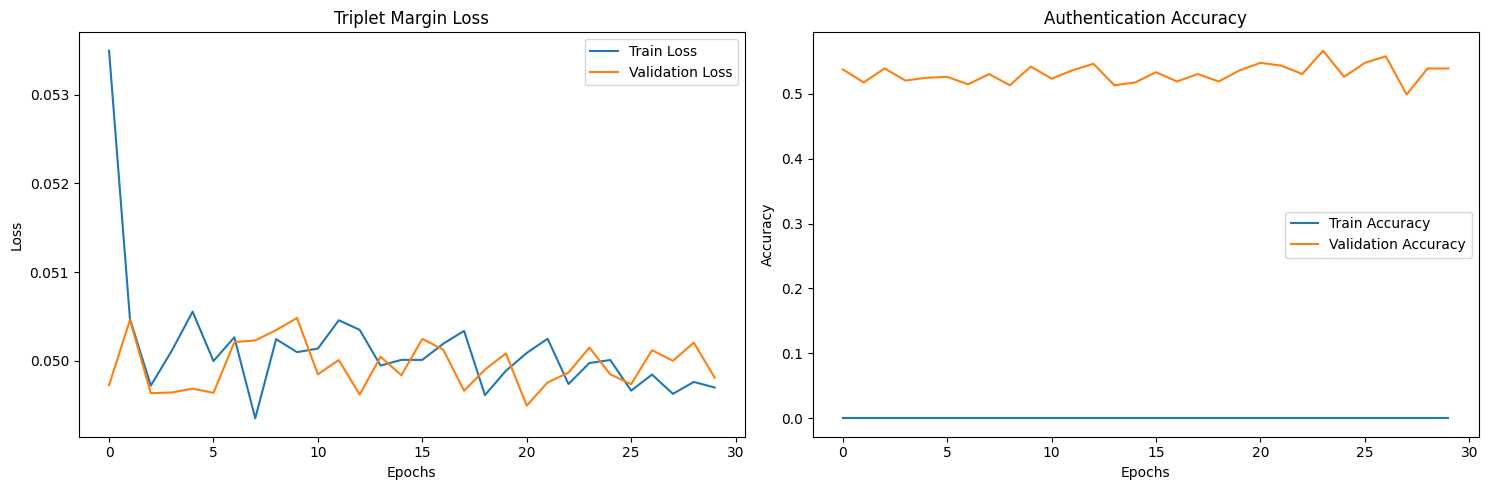

In [31]:
plot_loss_and_accuracy(eegnet_history)

In [1]:
eegnet_embeddings = extract_embeddings(eegnet_model, eegnet_loaders['test'])
plot_embeddings(eegnet_embeddings)

NameError: name 'extract_embeddings' is not defined